## Imports

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import math
import numpy as np

In [112]:
def safe_eval(s, default=None):
    if s.strip():  # Checks if the string is not empty or whitespace
        try:
            return ast.literal_eval(s)
        except (SyntaxError, ValueError):
            pass
    return default

In [118]:
path_center_csv = "today_center_new.csv"
path_arc_points = "today_edges.csv"
center_data = pd.read_csv(path_center_csv)
arc_data = pd.read_csv(path_arc_points, delimiter=",")

df_combined = pd.merge(center_data, arc_data, on='id', how='inner')

#df_combined['parsed_predictions'] = df_combined['predictions_x'].apply(lambda x: safe_eval(x, default=[0, 0]))
#df_combined['x'] = df_combined['parsed_predictions'].apply(lambda lst: lst[0] if lst else '')
#df_combined['y'] = df_combined['parsed_predictions'].apply(lambda lst: lst[1] if lst else '')

df_combined.head()

,id,x,y,Unnamed: 0,predictions
0,10000,70,68,0,"[[129, 88], [131, 73], [29, 27], [72, 8]]"
1,10001,224,224,1,"[[65, 355], [209, 431], [100, 57], [55, 106], ..."
2,10002,113,116,2,"[[82, 215], [163, 208], [32, 181], [58, 203], ..."
3,10003,122,126,3,"[[108, 239], [182, 223], [168, 232], [132, 241..."
4,10004,62,59,4,"[[62, 111], [50, 9], [62, 7]]"


### Define the functions

In [119]:
def vector(p1, p2):
    return (p2[0] - p1[0], p2[1] - p1[1])

# Function to calculate the dot product between two vectors
def dot(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1]

# Function to calculate the cross product (to determine orientation)
def cross(v1, v2):
    return v1[0] * v2[1] - v1[1] * v2[0]

# Function to calculate the angle between two vectors
def angle_between_vectors(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    cosine_theta = dot_product / (magnitude_v1 * magnitude_v2)
    angle_radians = math.acos(cosine_theta)
    angle_degrees = angle_radians * (180 / math.pi)  # Convert to degrees
    return angle_degrees

def angle_from_x(vector):
    return math.atan2(vector[1], vector[0])  # In radians

### Iterating over the data

In [121]:
import ast

predictions = []
ids = []
counter = 0
for index, row in df_combined.iterrows():
    #counter = counter + 1
    #if counter == 10:
    #    break
    # Access row data using column names
    id = row['id']
    #if id >= 20000:
    #    break
    center = (int(float(row['x'])), int(float(row['y'])))
    row_list = ast.literal_eval(row['predictions'])
    arc_points = [(round(item[0]),round(item[1])) for item in row_list]

    print(id)

    if len(arc_points) == 0:
        predictions.append([])
        ids.append(id)
        continue
    elif len(arc_points) == 1:
        angles = [100]
        predictions.append([angle for angle in angles])
        ids.append(id)
        continue



    # Calculate the vectors from the center to each point
    vectors = [vector(center, point) for point in arc_points]

    # Calculate the angles for each vector
    angles = [angle_from_x(v) for v in vectors]

    # Create a list of points with their corresponding angles
    points_with_angles = list(zip(arc_points, angles))

    # Sort the points based on the angles to ensure correct circular order
    sorted_points_with_angles = sorted(points_with_angles, key=lambda x: x[1])

    # Extract the sorted points
    sorted_points = [point for point, angle in sorted_points_with_angles]

    target_angle = -math.pi / 2  # 12 o'clock position


    closest_point_index = min(
        range(len(sorted_points_with_angles)),
        key=lambda i: abs(sorted_points_with_angles[i][1] - target_angle),
    )

    # Rearrange the list to start from the closest point to 12 o'clock
    reordered_points = (
        sorted_points[closest_point_index:]
        + sorted_points[:closest_point_index]
    )

    # Output the rearranged points to ensure correct start
    #print("Reordered points, starting from closest to 12 o'clock:")
    #for point in reordered_points:
    #    print(point)
    # Calculate the vectors from the center to each point
    vectors = [vector(center, point) for point in reordered_points]

    # Calculate the angle between each pair of vectors and its orientation
    angles = []
    for i in range(len(vectors)):
        # Get the two vectors (cyclic)
        v1 = vectors[i]
        v2 = vectors[(i + 1) % len(vectors)]

        # Calculate the angle and the cross product to determine orientation
        if v1 == v2:
            continue
        try:
            angle = angle_between_vectors(v1, v2)
        except:
            continue
        angle = angle_between_vectors(v1, v2)

        cross_product = cross(v1, v2)

        # Determine if the angle is clockwise or counterclockwise
        if cross_product < 0:
            angle = 360 - angle  # Clockwise
        angles.append(angle)

    # Output the calculated angles and percentages
    print("Angles between vectors (in degrees):")
    predictions.append([(angle / 360) * 100 for angle in angles])
    ids.append(id)
    #for i, angle in enumerate(angles):
    #    ratio = (angle / 360) * 100
    #    print(f"Segment {i + 1}: {angle:.4f} degrees ({ratio:.4f}%)")

#for i in range(20000,30000):
#    predictions.append([])
#    ids.append(i)

submission_df = pd.DataFrame({
    'id': ids,
    'predicted_percentages': [str(lst) for lst in predictions]
})

submission_df.to_csv('submission_total.csv', index=False)


10000
Angles between vectors (in degrees):
10001
Angles between vectors (in degrees):
10002
Angles between vectors (in degrees):
10003
Angles between vectors (in degrees):
10004
Angles between vectors (in degrees):
10005
Angles between vectors (in degrees):
10006
Angles between vectors (in degrees):
10007
Angles between vectors (in degrees):
10008
Angles between vectors (in degrees):
10009
Angles between vectors (in degrees):
10010
Angles between vectors (in degrees):
10011
Angles between vectors (in degrees):
10012
Angles between vectors (in degrees):
10013
Angles between vectors (in degrees):
10014
Angles between vectors (in degrees):
10015
Angles between vectors (in degrees):
10016
Angles between vectors (in degrees):
10017
Angles between vectors (in degrees):
10018
Angles between vectors (in degrees):
10019
Angles between vectors (in degrees):
10020
Angles between vectors (in degrees):
10021
Angles between vectors (in degrees):
10022
Angles between vectors (in degrees):
10023
Angle

## Loading the center and arc points

In [60]:
# Load the image from the image folder (assuming 'image_folder' contains the path to the folder and 'image_name' is the name of the image)
image_folder = 'C:/Users/phili/Documents/Datathon 2024/Datathon-2024/images/images/'
image_name = 'chart_2.png'  # replace with your image name
image_path = f'{image_folder}/{image_name}'
image = Image.open(image_path)

# Load the CSV file (assuming 'csv_folder' contains the path to the folder and 'csv_name' is the CSV file name)
csv_folder = 'C:/Users/phili/Documents/Datathon 2024/Datathon-2024/'
csv_name = 'train.csv'  # replace with your CSV file name
csv_path = f'{csv_folder}/{csv_name}'
data = pd.read_csv(csv_path)

# Take the "boxes" column
boxes_column = data['boxes']

# Take the first row of the "boxes" column
first_row = boxes_column.iloc[2]

# If the data is in string format, convert it into a 2D list

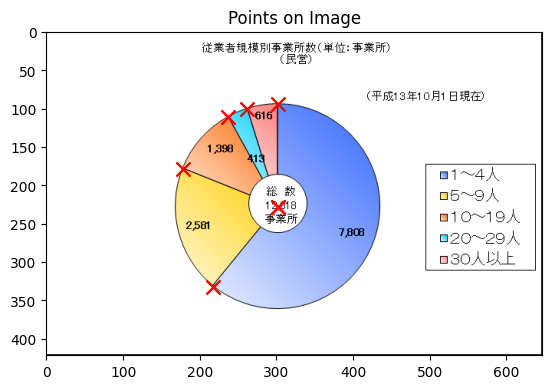

In [61]:
import ast
first_row_list = ast.literal_eval(first_row)

x_coords = []
y_coords = []
for sub_list in first_row_list:
    for i in range(0, len(sub_list), 2):  # Step by 2 to get pairs of coordinates
        x_coords.append(sub_list[i])  # Append x coordinate
        y_coords.append(sub_list[i + 1])  # Append y coordinate

# Plot the points onto the image using Matplotlib
plt.imshow(image)  # Display the image
plt.scatter(x_coords, y_coords, color='red', marker='x', s=100)  # Plot the points with red 'x' markers
plt.title('Points on Image')
plt.show()  # Display the plot

In [62]:
## Algorithm data for example 0
first_row_list = ast.literal_eval(boxes_column.iloc[2])

arc_points = []
center = (first_row_list[0][4], first_row_list[0][5])
arc_points = [(item[0],item[1]) for item in first_row_list]
print(first_row_list)
print(center)
print(arc_points)


[[302, 94, 217, 332, 302, 228], [217, 332, 178, 178, 302, 228], [178, 178, 237, 111, 302, 228], [237, 111, 262, 100, 302, 228], [262, 100, 302, 94, 302, 228]]
(302, 228)
[(302, 94), (217, 332), (178, 178), (237, 111), (262, 100)]


In [64]:

# Function to create a vector from the center to a point
def vector(p1, p2):
    return (p2[0] - p1[0], p2[1] - p1[1])

# Function to calculate the dot product between two vectors
def dot(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1]

# Function to calculate the cross product (to determine orientation)
def cross(v1, v2):
    return v1[0] * v2[1] - v1[1] * v2[0]

# Function to calculate the angle between two vectors
def angle_between_vectors(v1, v2):
    dot_product = dot(v1, v2)
    magnitude_v1 = math.sqrt(dot(v1, v1))
    magnitude_v2 = math.sqrt(dot(v2, v2))
    cosine_theta = dot_product / (magnitude_v1 * magnitude_v2)
    angle_radians = math.acos(cosine_theta)
    angle_degrees = angle_radians * (180 / math.pi)  # Convert to degrees
    return angle_degrees

def angle_from_x(vector):
    return math.atan2(vector[1], vector[0])  # In radians

np.random.shuffle(arc_points)
print(arc_points)
# Calculate the vectors from the center to each point
vectors = [vector(center, point) for point in arc_points]

# Calculate the angles for each vector
angles = [angle_from_x(v) for v in vectors]

# Create a list of points with their corresponding angles
points_with_angles = list(zip(arc_points, angles))

# Sort the points based on the angles to ensure correct circular order
sorted_points_with_angles = sorted(points_with_angles, key=lambda x: x[1])

# Extract the sorted points
sorted_points = [point for point, angle in sorted_points_with_angles]

target_angle = -math.pi / 2  # 12 o'clock position
closest_point_index = min(
    range(len(sorted_points_with_angles)),
    key=lambda i: abs(sorted_points_with_angles[i][1] - target_angle),
)

# Rearrange the list to start from the closest point to 12 o'clock
reordered_points = (
    sorted_points[closest_point_index:]
    + sorted_points[:closest_point_index]
)

# Output the rearranged points to ensure correct start
print("Reordered points, starting from closest to 12 o'clock:")
for point in reordered_points:
    print(point)
# Calculate the vectors from the center to each point
vectors = [vector(center, point) for point in reordered_points]

# Calculate the angle between each pair of vectors and its orientation
angles = []
for i in range(len(vectors)):
    # Get the two vectors (cyclic)
    v1 = vectors[i]
    v2 = vectors[(i + 1) % len(vectors)]

    # Calculate the angle and the cross product to determine orientation
    angle = angle_between_vectors(v1, v2)
    cross_product = cross(v1, v2)

    # Determine if the angle is clockwise or counterclockwise
    if cross_product < 0:
        angle = 360 - angle  # Clockwise
    angles.append(angle)

# Output the calculated angles and percentages
print("Angles between vectors (in degrees):")
print([(angle / 360) * 100 for angle in angles])
for i, angle in enumerate(angles):
    ratio = (angle / 360) * 100
    print(f"Segment {i + 1}: {angle:.4f} degrees ({ratio:.4f}%)")

[(178, 178), (217, 332), (237, 111), (262, 100), (302, 94)]
Reordered points, starting from closest to 12 o'clock:
(302, 94)
(217, 332)
(178, 178)
(237, 111)
(262, 100)
Angles between vectors (in degrees):
[60.90538704473558, 20.19476962751344, 10.829119966896215, 3.250160961893283, 4.820562398961481]
Segment 1: 219.2594 degrees (60.9054%)
Segment 2: 72.7012 degrees (20.1948%)
Segment 3: 38.9848 degrees (10.8291%)
Segment 4: 11.7006 degrees (3.2502%)
Segment 5: 17.3540 degrees (4.8206%)
